# Requirements

In [1]:
import attr
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from operator import attrgetter
import random
import scipy as sp
import scipy.stats

# Particles

We define a class that represents particles in two dimensions.  Particles have a position, a velocity and a mass.  These properties are set when the particle is created, and can not be modified, except through the `move` method that takes a time interval $\Delta t$ as an argument.

The position, velocity and mass attributes can be accessed using properties, as can the kinetic energy.

In [2]:
@attr.s
class Particle:
    _x: float = attr.ib()
    _y: float = attr.ib()
    _v_x: float = attr.ib()
    _v_y: float = attr.ib()
    _mass: float = attr.ib()
    
    @property
    def position(self):
        return self._x, self._y
    
    @property
    def velocity(self):
        return self._v_x, self._v_y
    
    @property
    def mass(self):
        return self._mass
    
    @property
    def energy(self):
        return 0.5*self._mass*(self._v_x**2 + self._v_y**2)
    
    def move(self, Δt: float):
        self._x += self._v_x*Δt
        self._y += self._v_y*Δt

In [3]:
p = Particle(x=0.0, y=0.0, v_x=0.3, v_y=0.9, mass=1.0)

In [4]:
p.energy

0.45

In [5]:
p.position

(0.0, 0.0)

In [6]:
p.move(Δt=0.01)

In [7]:
p.position

(0.003, 0.009000000000000001)

In [8]:
p.energy

0.45

# Particle factory

We want to create an ensemble of particles with a specific mass at a given temperature.  To that purpose, we create a factory class that can be instantiated for a specific particle mass and temperature, and that has a `create` method to generate a particle located at the origin and with a random velocity according to a Maxwell distribution determined by the particles' mass and the temperature.

In [9]:
@attr.s
class ParticleFactory:
    _T: float = attr.ib()
    _mass: float = attr.ib()
        
    @_T.validator
    def _(self, attribute, value: float):
        if self._T < 0.0:
            raise ValueError('temperature must be positive')

    @_mass.validator
    def _(self, attribute, value: float):
        if self._mass < 0.0:
            raise ValueError('mass must be positive')
            
    def create(self):
        v: float = sp.stats.maxwell.rvs(scale=self._T/self._mass, size=1)[0]
        v_x: float = random.choice([-1.0, 1.0])*random.random()*v
        v_y: float = random.choice([-1.0, 1.0])*sqrt(v**2 - v_x**2)
        return Particle(x=0.0, y=0.0, v_x=v_x, v_y=v_y, mass=self._mass)

We create a factory for particles with unit mass at a temperature of 5.0, and use the factory to create 5000 of such particles.

In [10]:
particle_factory_5 = ParticleFactory(T=5.0, mass=1.0)

In [11]:
particles_5 = [particle_factory_5.create() for _ in range(5_000)]

We do the same, but now for a temperature of 10.0.

In [12]:
particle_factory_10 = ParticleFactory(T=10.0, mass=1.0)

In [13]:
particles_10 = [particle_factory_10.create() for _ in range(5_000)]

We can now plot the velocity distribution for each of the ensembles of particles.

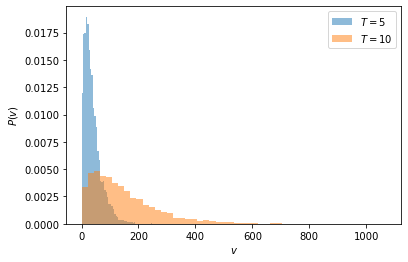

In [14]:
_ = plt.hist(list(map(attrgetter('energy'), particles_5)), bins=50, density=True, alpha=0.5, label='$T = 5$')
_ = plt.hist(list(map(attrgetter('energy'), particles_10)), bins=50, density=True, alpha=0.5, label='$T = 10$')
_ = plt.xlabel(r'$v$')
_ = plt.ylabel(r'$P(v)$')
_ = plt.legend()